# Part 1 ‐ Exploratory data analysis

In [516]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import sklearn.model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report 
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [355]:
logins=pd.read_json("logins.json")
logins.head()


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [356]:
logins.columns

Index(['login_time'], dtype='object')

In [357]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [358]:
print(logins.describe())
print(logins.max())
logins.min()


                 login_time
count                 93142
unique                92265
top     1970-04-04 01:17:40
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38
login_time   1970-04-13 18:57:38
dtype: datetime64[ns]


<ipython-input-358-8856ef145c3b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(logins.describe())


login_time   1970-01-01 20:12:16
dtype: datetime64[ns]

In [359]:
#logins.login_time.duplicated().sum()


In [360]:
logins.isnull().sum()

login_time    0
dtype: int64

In [361]:
logins['login_count']=1
logins.set_index('login_time', inplace=True)
logins.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


<AxesSubplot:xlabel='login_time'>

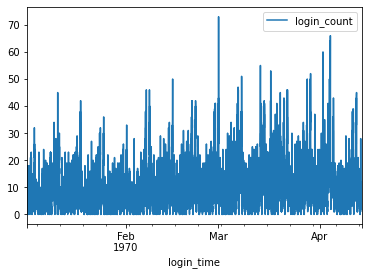

In [362]:
logins.resample('15min').sum().plot()

In [363]:
data=logins.resample('15min').sum()
data.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


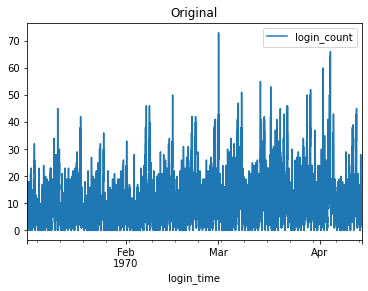

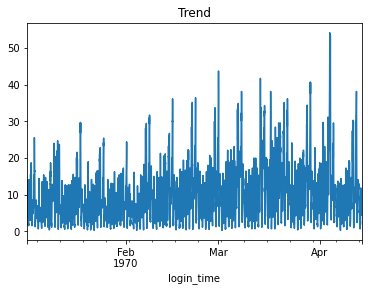

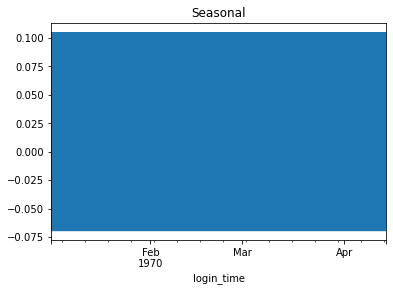

<AxesSubplot:title={'center':'Residual'}, xlabel='login_time'>

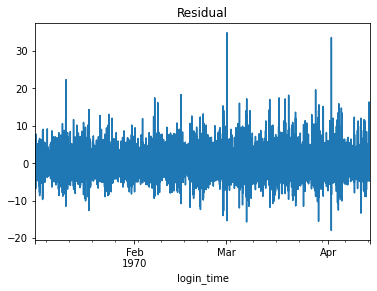

In [364]:
decomposition = sm.tsa.seasonal_decompose(data, model='additive',period = 7)
#decomposition.plot()
data.plot(title='Original')
plt.show()
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
trend.plot(title='Trend')
plt.show()
seasonal.plot(title='Seasonal')
plt.show()
residual.plot(title='Residual')

# We can see some increase when looking at the 15 trend. This is by looking at the Trend data

<AxesSubplot:xlabel='login_time'>

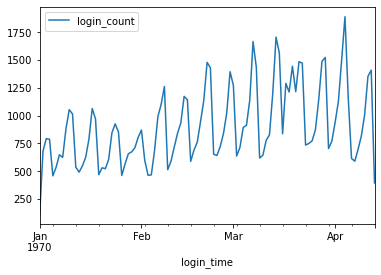

In [365]:
logins.resample('D').sum().plot()

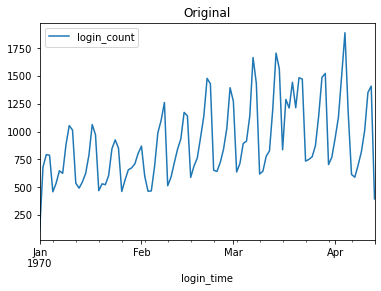

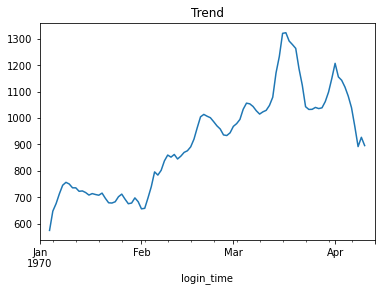

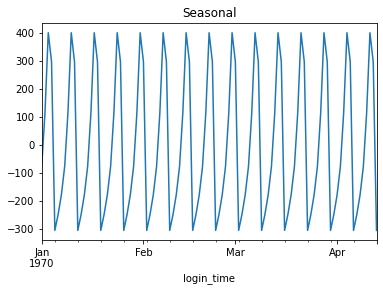

<AxesSubplot:title={'center':'Residual'}, xlabel='login_time'>

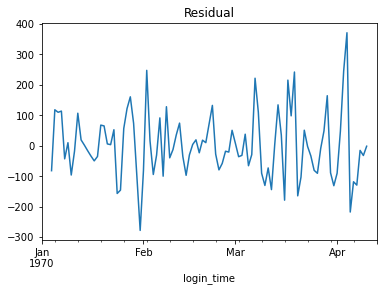

In [366]:
decomposition = sm.tsa.seasonal_decompose(logins.resample('D').sum(), model='additive',period = 7)
#decomposition.plot()
logins.resample('D').sum().plot(title='Original')
plt.show()
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
trend.plot(title='Trend')
plt.show()
seasonal.plot(title='Seasonal')
plt.show()
residual.plot(title='Residual')

# # The daily logins show increase in logins since Feb, peking in March
# Here we can see seasonality . There is a pattern

In [382]:
# We can take a look at the day of the week activity to better understand the seasonality .
#from datetime import datetime as dt
data_daily=logins.resample('D').sum()

data_daily['day_week']=data_daily.index.dayofweek
#data_daily.day_week.value_counts()


<AxesSubplot:xlabel='day_week'>

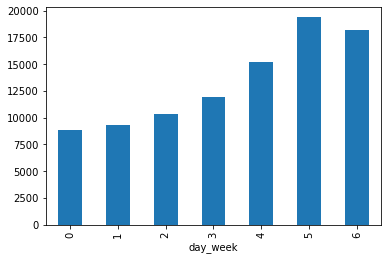

In [383]:
data_daily.groupby('day_week').login_count.sum().plot.bar()

<AxesSubplot:xlabel='day_week'>

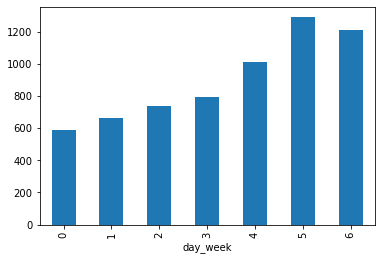

In [384]:
data_daily.groupby('day_week').login_count.mean().plot.bar()
#Monday=0, Sunday=6.
# There are more logins at the end of the week , while Saterday is the busiest day.

<AxesSubplot:xlabel='time_day'>

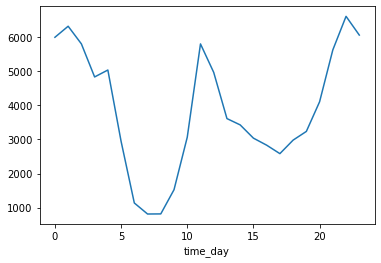

In [370]:
# It is also interesting to chect what times during the days are the buisiest.
logins['time_day']=logins.index.hour
#logins['day_week']=logins.index.dayofweek
#logins.head()

logins.groupby('time_day').login_count.sum().plot()


<AxesSubplot:xlabel='login_time'>

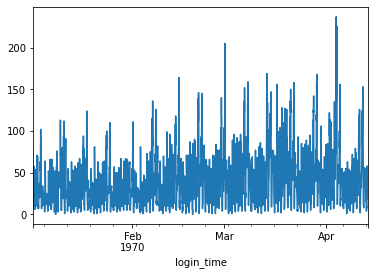

In [371]:
logins['login_count'].resample('1H').sum().plot()

C:\Users\Diana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

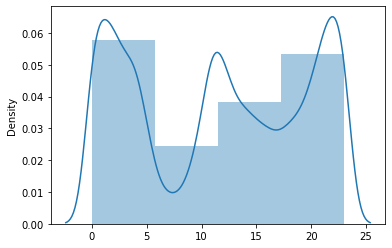

In [372]:

sns.distplot(x = logins['time_day'], bins = 4)

In [373]:
def f(x):
    if (x > 4) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    else:
        return'Late Night'
    
logins['part_day'] = logins['time_day'].apply(f)

In [374]:
logins['time_day'].value_counts()
logins['part_day'].value_counts()

Late Night    46263
Morning       21070
Noon          12907
Eve           12902
Name: part_day, dtype: int64

<AxesSubplot:xlabel='day_week'>

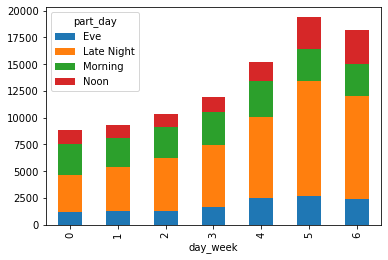

In [385]:
data_daily['day_week']=data_daily.index.dayofweek
df_pivot = pd.pivot_table(logins, index='day_week', columns='part_day', values='login_count', aggfunc='sum')
df_pivot.plot.bar(stacked=True)

This table shows how the logins distributed acros the week and the time of day. We can see that although there are more logins during the weekend, they are sidtributed in the same pattern. Most logins are at night , very little at noon and evening. 


<AxesSubplot:xlabel='time_day'>

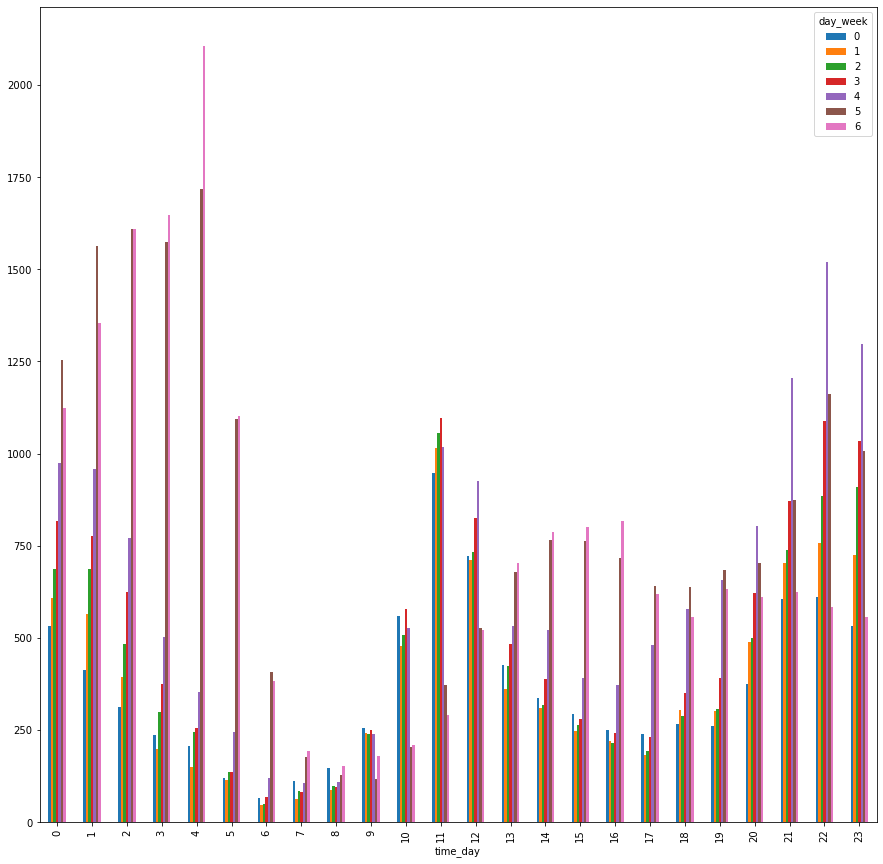

In [386]:
df_pivot = pd.pivot_table(logins, index='time_day', columns='day_week', values='login_count', aggfunc='sum')
df_pivot.plot.bar(figsize=(15,15))

It is intersting to see that most of the time there are more logins on the weekend.
The 9-12 timeslots that have more logings during weekdays.

# Part 2 ‐ Experiment and metrics design

1. My primery metric will be the total toll paid. If there is a reimbursment the people will be paying less for toll. 
2. a. The experiment will be a comparison of before and after the project started.

   b. I will use a t test to compare the mean of a period befor, we can take a month to a mean of month imidiatly after.
      I will check if the t test is statisticaly significant and the change wasn't random. I would also try to check  
      for other variables that could have influenced results: started raining, any holidays or brakes. If there are no 
      other reasons we can say that probably the change was due to the project. If there are some chnages we could adjuct perio       of time that we sample or statisticly control the other features.
      
   c. I will recommend to continue with the reimbursment because there was a change in behaviour.I will recomend to repeat the mesuare later in time , two month later, sex month later or periodicaly, because we want to see that the encouragment made a real change of behaviour and not temporary excitemnt that will fade away after a month. I will recomend to adjust the experiment if they deside to cancell the reimbursment at some point. The toll price migh not be the right mesure after they will stop reimbursing and a different mmetrics shoul be used.

# Part 3 ‐ Predictive modeling

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [387]:
data=pd.read_json('ultimate_data_challenge.json')
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [388]:
data.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [390]:
data.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [391]:
data.duplicated().sum()
data.drop_duplicates(keep='first')
# Maybe they are real duplicated and maybe not. The number is very small we can drop the rows

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [392]:
data_clean=data.dropna()
data_clean.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [393]:
data_clean.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,2.609675,4.601720,1.073822,8.898709,61.254897,5.460046,4.776446
std,4.059336,0.616104,0.198747,18.322061,34.813848,5.145174,0.404606
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,37.500000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.780000,5.000000
75%,3.000000,5.000000,1.070000,11.100000,100.000000,6.490000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000


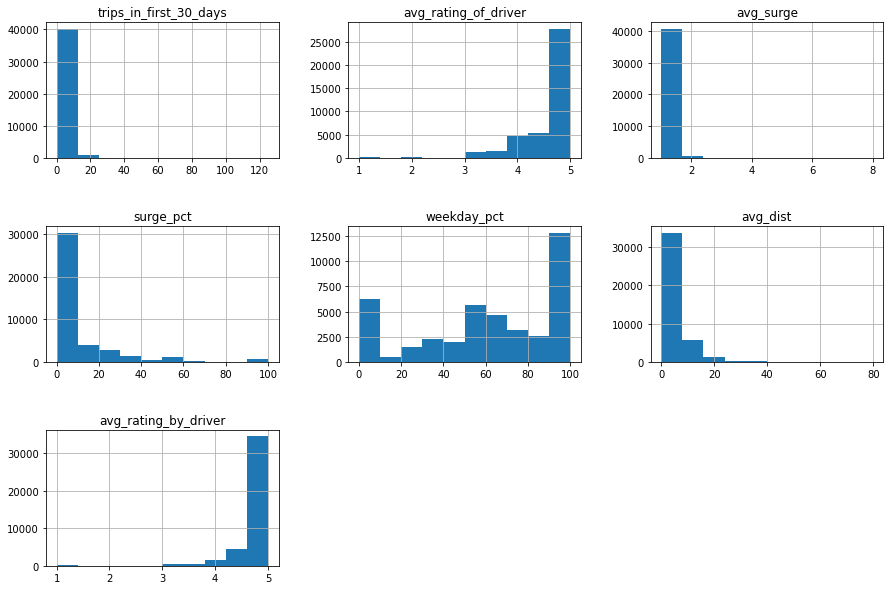

In [394]:
data_clean.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);
# Here are the distributions.
#The distriburions are very skewed. We can check for autliers in the trips and the distance and the two surge related features.
#We can also check for mistakes.

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


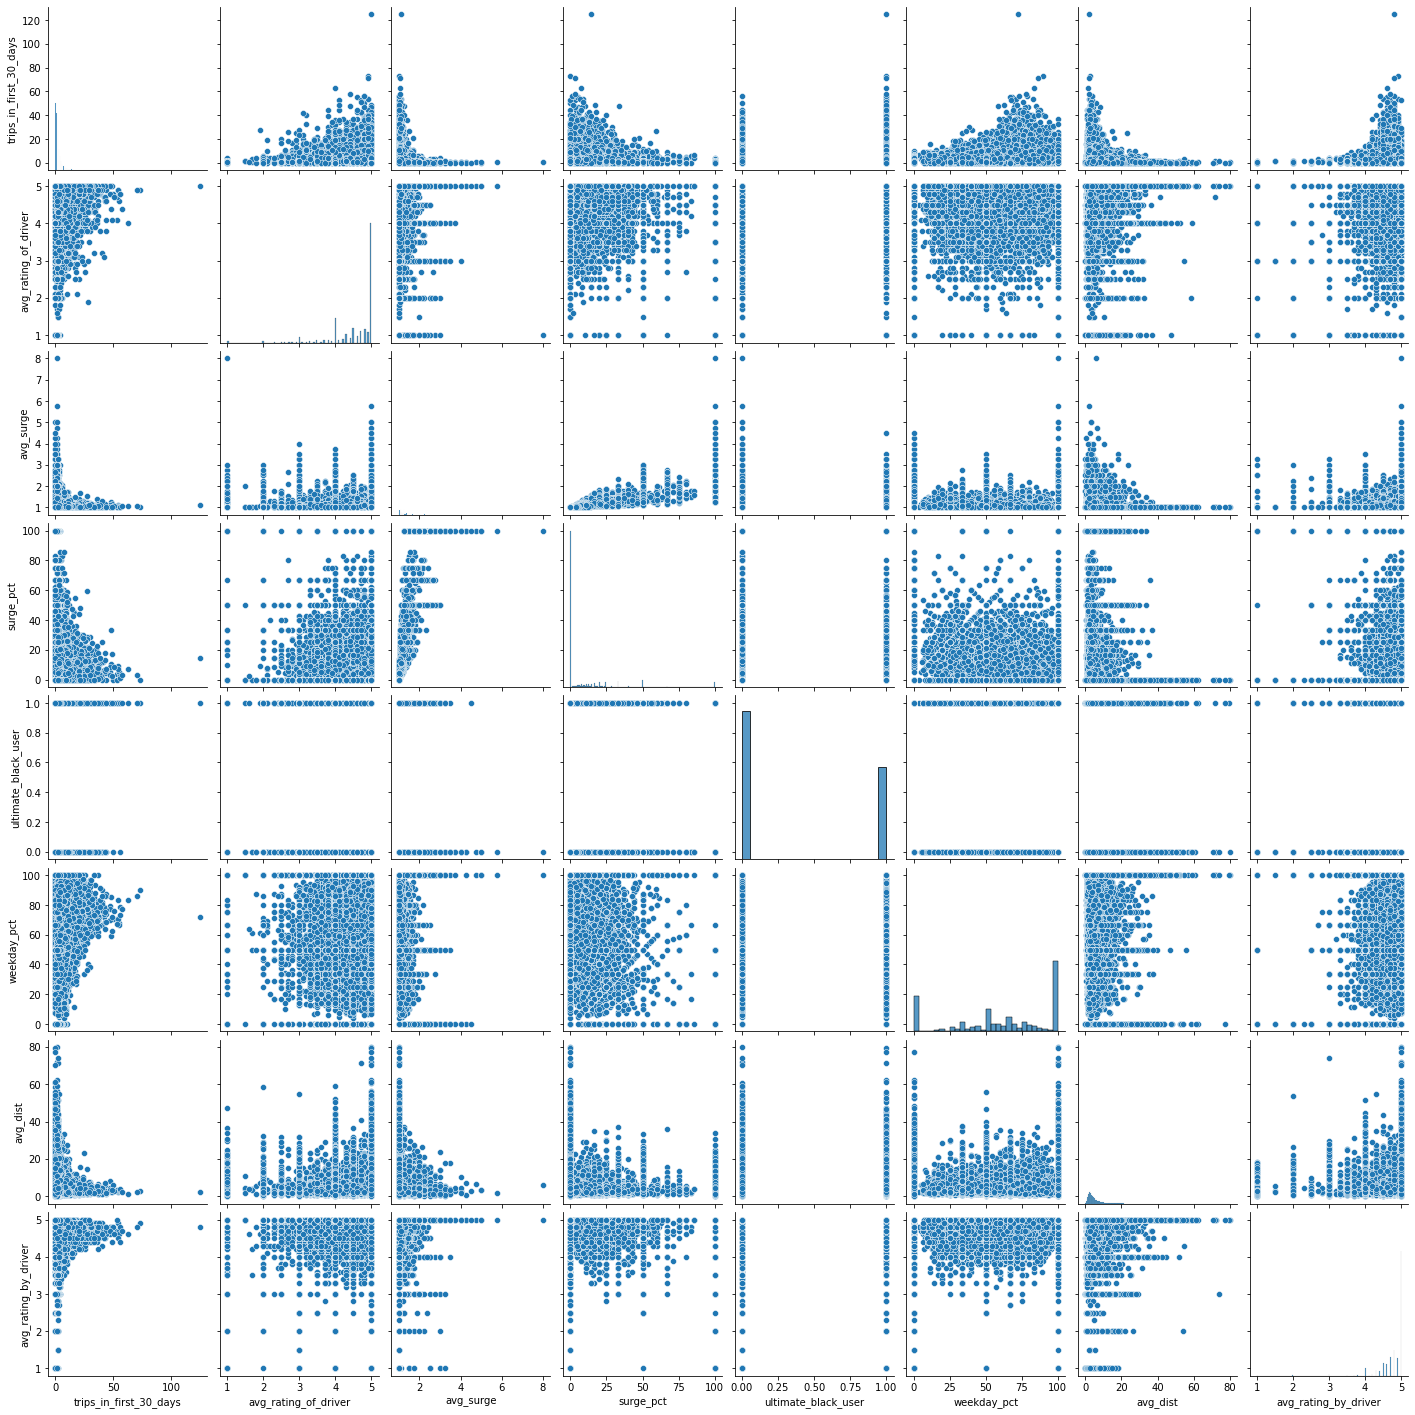

In [395]:
sns.pairplot(data_clean)
# This helps to visualize the corelations or lack of corlation.

<AxesSubplot:>

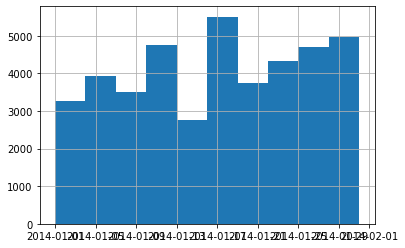

In [396]:
pd.to_datetime(data_clean.signup_date).hist()
# We can see when more people joined.

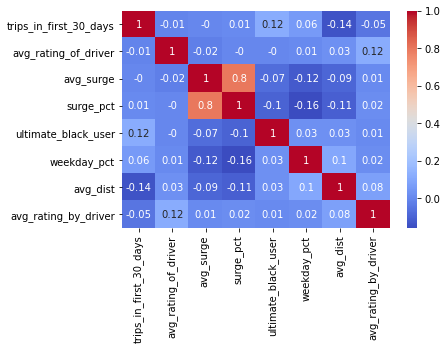

In [397]:
corr_map=data_clean.corr()
ax,fig=plt.subplots()
ax=sns.heatmap(round(corr_map,2), annot=True, cmap="coolwarm")

It looks like most of the sata is not highly correlated. The percent of trips taken with surge multiplier > 1
and The average surge multiplier over all of this user’s trips are very correlated. 
We can use only one of the features if we need to improve model's performance.???????????

<AxesSubplot:>

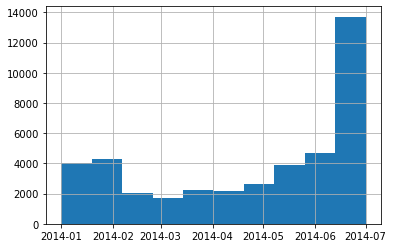

In [398]:
# Now I explore the retention.The last trip date will be the feature to use.
pd.to_datetime(data_clean.last_trip_date).hist()
# We can see that many people continued useing the service as many were stil riding in July. But some proportion of users 
# stoped uding the service in each month since January.

In [399]:
# I would also continue exploring some relationships relaed if the serge level was related to retantion.
#also compare some categories of users: earlier customers , those who signed up for ultimate_black user vs those who didn't,
# I would explore the time patters as well, weekdays.

In [400]:
print(data_clean.last_trip_date.max())
print(data_clean.last_trip_date.min())

2014-07-01
2014-01-01


In [401]:
# What fraction of the observed users were retained
retained=data_clean.last_trip_date[data_clean.last_trip_date>='2014-06-01']
retained_count=retained.count()
total=data_clean.last_trip_date.count()
proportion=retained_count*100/total
proportion
# 41 % percent of users are retained

41.10266618409941

In [402]:
data_clean['retained']=0
data_clean.head()
data_clean['retained'][data_clean['last_trip_date']>='2014-06-01']=1
data_clean['retained'].value_counts()

<ipython-input-402-7d74f86b6412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['retained']=0
<ipython-input-402-7d74f86b6412>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['retained'][data_clean['last_trip_date']>='2014-06-01']=1
C:\Users\Diana\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._wh

0    24410
1    17035
Name: retained, dtype: int64

This is our taget feature with two classes and will be used for a perdictive classification model.


In [472]:
#Preprocessing:encoding categorical data.

#data_clean.drop(['last_trip_date', 'signup_date'] , inplace=True, axis=1)
columns=data_clean.select_dtypes('object').columns
columns.to_list()
df = pd.get_dummies(data_clean, columns = columns)

In [473]:
X=df.drop(['retained'], axis=1)
y=df['retained']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=24)

scaler.fit(X_train)
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)


In [476]:
# I will start with a simple 
c_= [0.001,0.01,0.1,1,10,100]

for i in c_:
    Log_r = LogisticRegression( C = i ,random_state = 24)
    Log_r.fit(X_train_s, y_train)
    
    # Predict using model
    y_pred = Log_r.predict(X_test_s)
    ac=accuracy_score(y_test, y_pred)
    pr=precision_score(y_test, y_pred)
    print(i, ac, pr)

    

0.001 0.6994812401978526 0.6780114722753346
0.01 0.7006876583423814 0.674842066146414
0.1 0.7006876583423814 0.6741947426878934
1 0.7008083001568344 0.6743153219837158
10 0.7008083001568344 0.6743153219837158
100 0.7008083001568344 0.6743153219837158


              precision    recall  f1-score   support

           0       0.71      0.82      0.76      4867
           1       0.67      0.53      0.60      3422

    accuracy                           0.70      8289
   macro avg       0.69      0.68      0.68      8289
weighted avg       0.70      0.70      0.69      8289

[0.68893871 0.69652737 0.68845885 0.68873282 0.7144915 ]
cv mean train score 0.6984247353942578
cv mean test score 0.6954298514417755
[0.67463599 0.68345036 0.67613603 0.67365876 0.6937664 ]
cv mean train score 0.6851167276100454
cv mean test score 0.6803295069368633
[0.74900633 0.75346434 0.76095303 0.75352623 0.76167337]
cv mean train score 0.7595142614894179
cv mean test score 0.7557246598932685
[[0.81919047 0.18080953]
 [0.46756283 0.53243717]]
0.6758138188256483


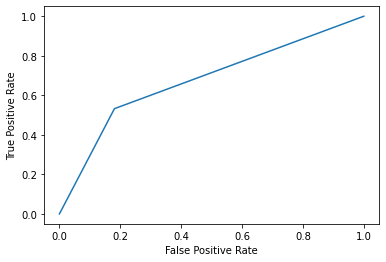

In [508]:
Log_r = LogisticRegression( C = 1 ,random_state = 24)
Log_r.fit(X_train_s, y_train)
y_log_pred=Log_r.predict(X_test_s)


# I will create an evaluation function to use:

def Evaluation(y_test, y_pred, model):
    print(classification_report(y_test, y_pred))
    matrix = confusion_matrix(y_test, y_pred, normalize='true')

    scoring=['precision_macro','f1_macro','roc_auc']
    for scor in scoring:
        cv_scores_train= cross_val_score(model ,X_train_s,y_train,cv=5,scoring=scor)
        cv_scores_test= cross_val_score(model,X_test_s, y_test,cv=5,scoring=scor)
        cv_scores_mean_test= cv_scores_test.mean()
        cv_scores_mean_train= cv_scores_train.mean()
        print(cv_scores_test)
        print("cv mean train score", cv_scores_mean_train)
        print("cv mean test score", cv_scores_mean_test) 
    print(matrix)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    print(roc_auc_score(y_test, y_pred))
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
       
    
evaluate_logistic=Evaluation(y_test, y_log_pred, Log_r)

The evaluation scores are not high, it looks like Logistic regression is too simple model for this data
I will try a more robust model.

In [492]:
max_d=[2,5,8,11,14,17,20]
for max_depth in max_d:
    RF = RandomForestClassifier(bootstrap=True, max_depth=max_depth, random_state=24)
    RF.fit(X_train_s, y_train)
    y_predict_rf = RF.predict(X_test_s)
    ra=roc_auc_score(y_test, y_predict_rf)
    pr=precision_score(y_test, y_predict_rf)
    print(max_depth,ra,pr )

# Still not very good. We can tune more parameters. 

2 0.6802645880118937 0.7497674418604651
5 0.7487080058366098 0.7473226238286479
8 0.7619177725391378 0.7434045226130653
11 0.7634222870734415 0.7440550688360451
14 0.761687269444368 0.7389147286821706
17 0.7515532089885519 0.7194419168941462
20 0.7432752418301093 0.7020710059171598


In [510]:
n_estimators = list(range(1,100))
max_depth = [2,5,8,11,14,17,20]
min_samples_leaf= list(range(1,10))
criterion= ["gini", "entropy"] 
min_samples_split=list(range(2,10))
max_features=list(range(1,10))

hyperparameters = dict(n_estimators=n_estimators, max_depth= max_depth, max_features=max_features, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, criterion=criterion,)

clf = RandomizedSearchCV(RF, hyperparameters, cv=10, random_state=24)
best_model = clf.fit(X_train_s, y_train)

#Print The value of best Hyperparameters
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])
print('min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('max_features:', best_model.best_estimator_.get_params()['max_features'])


Best n_estimators: 69
Best max_depth: 11
Best min_samples_leaf: 6
Best criterion: gini
min_samples_split: 6
max_features: 3


              precision    recall  f1-score   support

           0       0.79      0.84      0.81      4867
           1       0.75      0.69      0.72      3422

    accuracy                           0.78      8289
   macro avg       0.77      0.76      0.77      8289
weighted avg       0.77      0.78      0.77      8289

[0.76285036 0.76082684 0.76813715 0.76315014 0.77456139]
cv mean train score 0.7698669764889849
cv mean test score 0.7659051748370036
[0.76016714 0.76319333 0.76338738 0.76490139 0.76393854]
cv mean train score 0.7649763094562481
cv mean test score 0.7631175566719562
[0.84180731 0.8403851  0.84833647 0.85048049 0.84692096]
cv mean train score 0.848050752775228
cv mean test score 0.8455860669314277
[[0.83583316 0.16416684]
 [0.30888369 0.69111631]]
0.7634747341829183


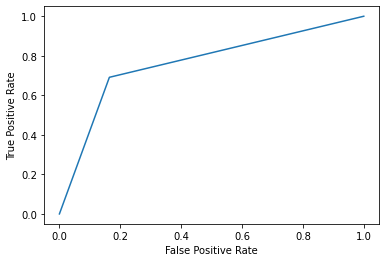

In [511]:
RF_tuned=RandomForestClassifier(max_depth=11, n_estimators=69, min_samples_leaf=6, max_features=3, min_samples_split=6, criterion='gini')
RF_tuned.fit(X_train_s, y_train)
y_pred_RF=RF_tuned.predict(X_test_s)

evaluate_RF=Evaluation(y_test, y_pred_RF, RF_tuned)

The Random Forest classifier performs better, 78% accuracy. Given more time I would continue to look for more accurate model.
Recall is the ability of a model to identify all the positive cases within a data set, meaning the retained customers. 
Precision is the ability of our model to identify only the positives out of all data points. we can see that this model's recall is better. This model shows higher recall rates. The importance of this to metrics is not very diferent: It is important to identify correctly and precicly, not beggier price is paid for false positive then false negative.
As for validity we can assume that the data is valid in the way it was collected and closer represents real data. We can also see that the model was close in the training data to the test data, train data doing slightly better. This means there is a good approximation and generalization without overfitting to the training data.


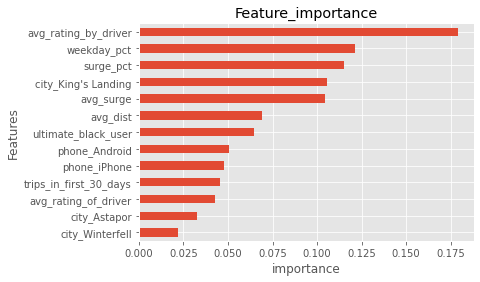

In [534]:
#To find specific recomendations.

list_names=pd.DataFrame(X_train).columns
imps=RF_tuned.feature_importances_
RF_feat_imps = pd.Series(imps, index=list_names).sort_values(ascending=True)

RF_feat_imps.plot.barh()
plt.title('Feature_importance')
plt.ylabel('Features')
plt.xlabel('importance')
plt.show()

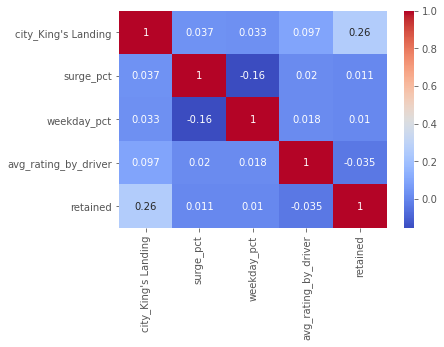

In [549]:
corr=df[["city_King's Landing",'surge_pct','weekday_pct',
       'avg_rating_by_driver', 'retained']].corr()
fig,ax=plt.subplots()
ax=sns.heatmap(corr, annot=True, cmap="coolwarm")

The most important fearures are average rating by driver, riding on weekday, the percent of trips taken with surge 
multiplier > 1 and signing up in the city King's Landing.
It looks like the drivers ratins are negativly correlated. Possibly people who continue using the service are not achatting with the driver as much, more anxious to go home and then rated lower. 

Ultimate can invest more effort in adjusting their user experience or retainment strategies for the users who are loyal, for example those who drive during weekdays, maybe to work in rush hours (as they also have the surge). At the same time they can invest more in improving ux , services and marketing strategies for the rest .
